# **Meflah wided _22214601**

# Notebook reconnaissance Elephant (partie 2)

Dans ce notebook, nous allons utilisé les techniques de data-générator et transfert-learning pour identifier les éléphants.

## Installation



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [ ]:


!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=75513e743774cc3202e5e1cb38a574e80f8e6c34eb8e2326e0c661440ff18369
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
import tensorflow.keras.callbacks as callbacks
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split  # Ajoutez cette ligne
import numpy as np

In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

def plot_curves(histories):
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(16, 6))
    plt.gcf().subplots_adjust(left=0.125, bottom=0.2, right=1, top=0.9, wspace=0.25, hspace=0)

    for i in range(len(histories)):
        # plot loss
        plt.subplot(121)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='red', label='test')
        plt.ylim(0, 4)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['Training loss', 'Validation loss'], loc='upper left')

        # plot accuracy
        plt.subplot(122)
        plt.title('Classification Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='red', label='test')
        plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

    plt.show()


Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive :

In [ ]:
import sys
my_local_drive='/content/gdrive/MyDrive/ML2_prjt2023'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/MyDrive/ML2_prjt2023


'/content/gdrive/MyDrive/ML2_prjt2023'

####Les jeux de données


Récupération des jeux de données :      

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

Définition de constante globale      


In [ ]:
# constantes globales

IMG_SIZE=124
COLUMNS = 25 # Nombre d'images à afficher

**Data generator avec le modele baseline**

In [ ]:
my_path = "Data_Project/Tiger-Fox-Elephant/"
my_classes = ['elephant','Elephant_negative_class']

X, y = create_X_y(my_path, my_classes)

#X = clean_data(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

y_train.shape = (y_train.shape[0],1)
y_test.shape = (y_test.shape[0],1)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

data batch shape: (80, 124, 124, 3)
labels batch shape: (80, 1)


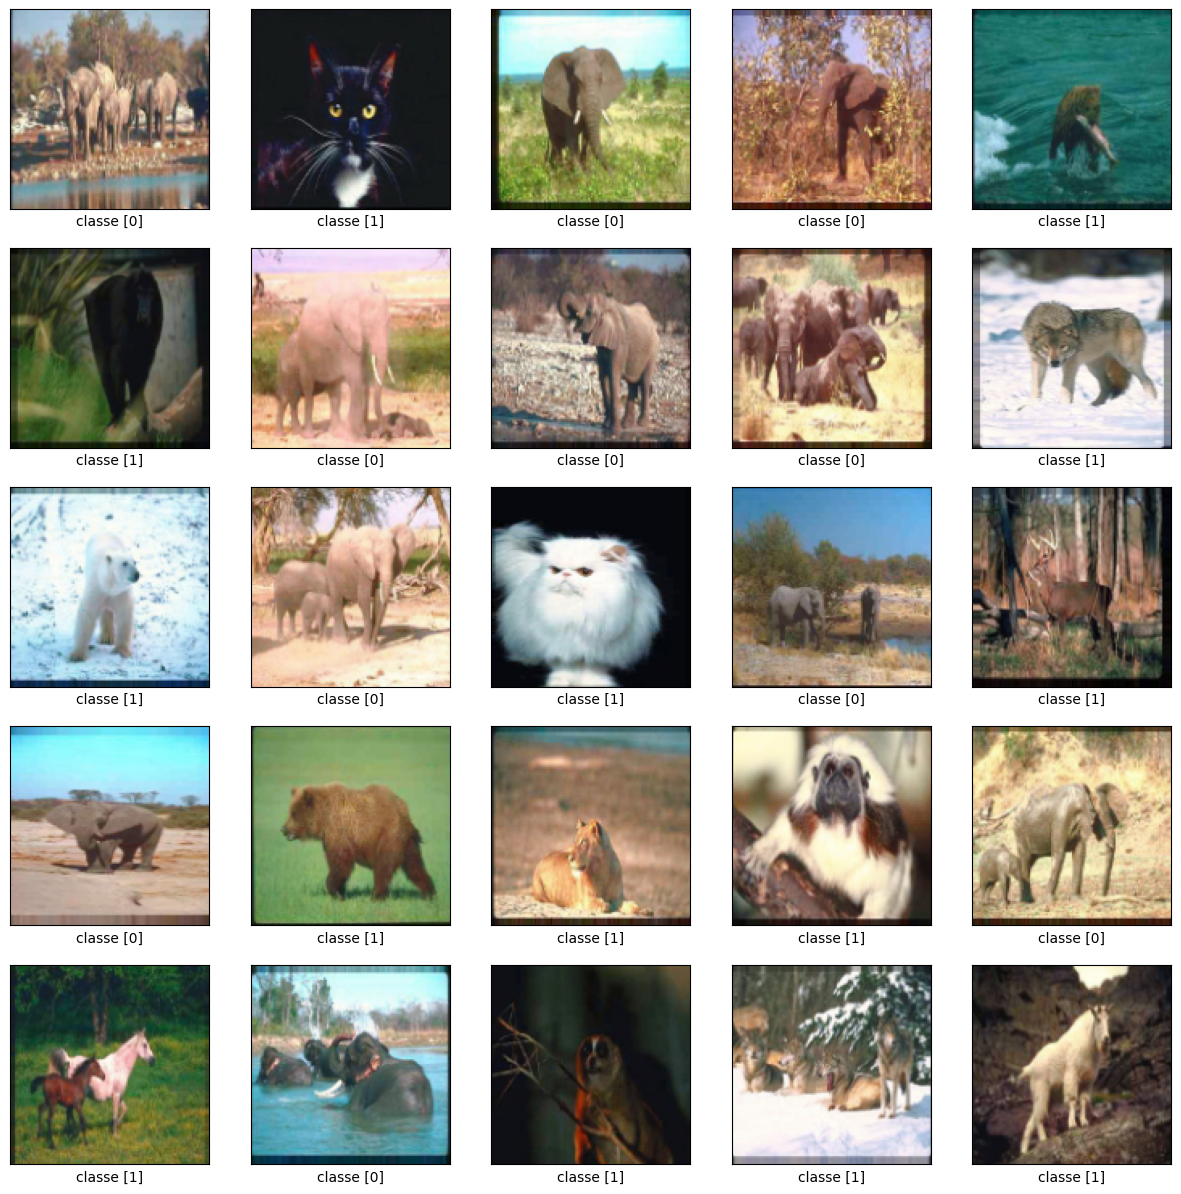

In [ ]:

datagen = ImageDataGenerator( zoom_range=0.1, fill_mode="nearest",  horizontal_flip=True)

batch_size = 80

train_iterator = datagen.flow(X_train, y_train, batch_size= batch_size, shuffle=False, save_prefix='augmente_train')
for X_batch, y_batch in train_iterator:
    print('data batch shape:',X_batch.shape)
    print('labels batch shape:',y_batch.shape)
    plot_examples(X_batch,y_batch)
    break

In [ ]:
def define_model_baseLine():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:

modelBaseLine= define_model_baseLine()

history = modelBaseLine.fit(train_iterator, epochs=300, validation_data =(X_test, y_test),verbose = 1)

Epoch 1/300
2/2 [==============================] - 1s 243ms/step - loss: 623.0902 - accuracy: 0.5125 - val_loss: 803.3041 - val_accuracy: 0.5750
Epoch 2/300
2/2 [==============================] - 1s 311ms/step - loss: 727.0002 - accuracy: 0.4812 - val_loss: 434.2349 - val_accuracy: 0.4250
Epoch 3/300
2/2 [==============================] - 1s 281ms/step - loss: 404.7128 - accuracy: 0.5188 - val_loss: 498.5094 - val_accuracy: 0.4250
Epoch 4/300
2/2 [==============================] - 1s 487ms/step - loss: 199.8445 - accuracy: 0.6125 - val_loss: 90.1591 - val_accuracy: 0.6750
Epoch 5/300
2/2 [==============================] - 1s 524ms/step - loss: 195.3520 - accuracy: 0.5688 - val_loss: 192.6659 - val_accuracy: 0.6000
Epoch 6/300
2/2 [==============================] - 1s 502ms/step - loss: 232.1565 - accuracy: 0.5437 - val_loss: 57.2830 - val_accuracy: 0.7000
Epoch 7/300
2/2 [==============================] - 1s 517ms/step - loss: 55.9935 - accuracy: 0.7625 - val_loss: 123.4223 - val_accur

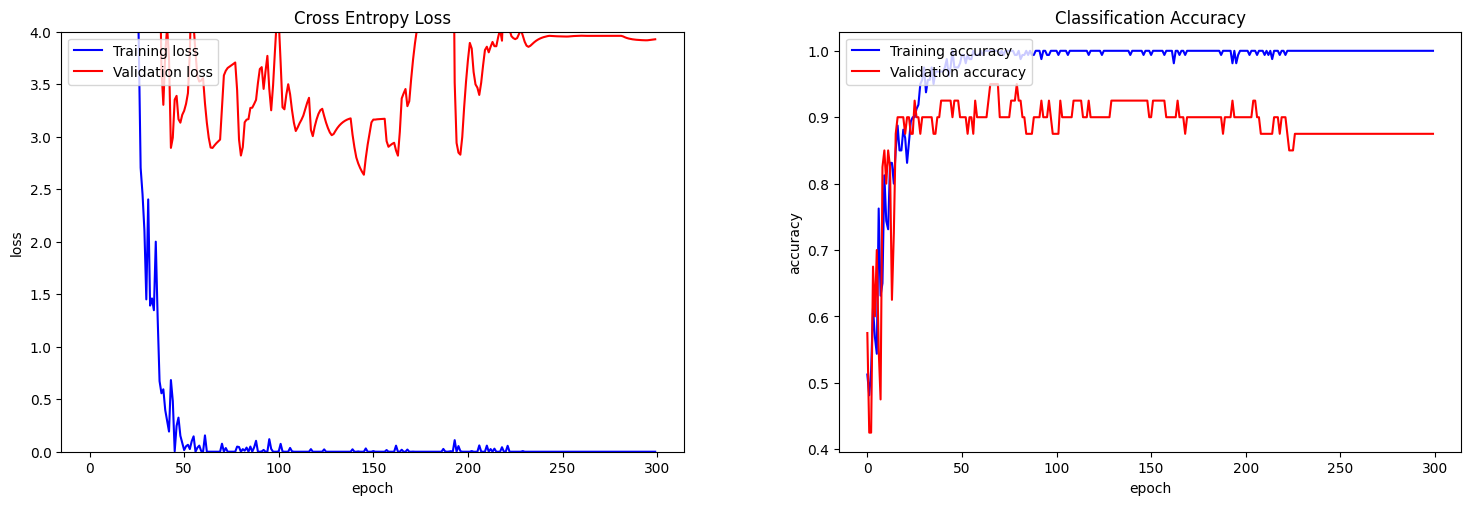

In [ ]:
histories = list()
histories.append(history)

plot_curves(histories)

In [ ]:

test_loss, test_acc = modelBaseLine.evaluate(X_test,  y_test, verbose=2)


2/2 - 0s - loss: 1.2430 - accuracy: 0.8500 - 128ms/epoch - 64ms/step


**Datagenerator avec modele-elephant(modèle amilioré)**

In [ ]:



def modele_ameliore():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:

modele_ameliore = modele_ameliore()
history = modele_ameliore.fit(train_iterator, epochs=300, validation_data =(X_test, y_test),verbose = 1)

Epoch 1/300
2/2 [==============================] - 4s 1s/step - loss: 333.2160 - accuracy: 0.4625 - val_loss: 5.9859 - val_accuracy: 0.7250
Epoch 2/300
2/2 [==============================] - 4s 1s/step - loss: 111.6753 - accuracy: 0.5688 - val_loss: 2.0425 - val_accuracy: 0.9000
Epoch 3/300
2/2 [==============================] - 3s 956ms/step - loss: 60.0678 - accuracy: 0.5437 - val_loss: 52.2583 - val_accuracy: 0.5250
Epoch 4/300
2/2 [==============================] - 2s 1s/step - loss: 36.4623 - accuracy: 0.5938 - val_loss: 16.4318 - val_accuracy: 0.4750
Epoch 5/300
2/2 [==============================] - 2s 937ms/step - loss: 22.4181 - accuracy: 0.5375 - val_loss: 6.5504 - val_accuracy: 0.4750
Epoch 6/300
2/2 [==============================] - 3s 2s/step - loss: 7.8820 - accuracy: 0.6250 - val_loss: 1.3528 - val_accuracy: 0.7500
Epoch 7/300
2/2 [==============================] - 2s 1s/step - loss: 2.8234 - accuracy: 0.6375 - val_loss: 1.2958 - val_accuracy: 0.7500
Epoch 8/300
2/2 [==

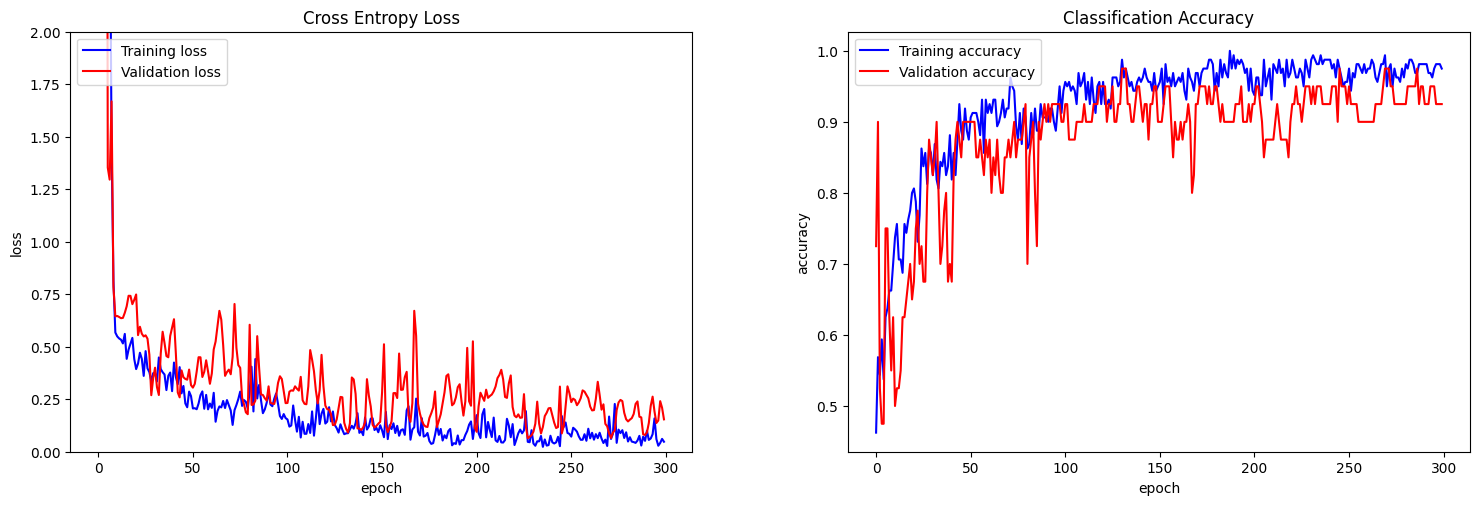

2/2 - 0s - loss: 0.1541 - accuracy: 0.9250 - 174ms/epoch - 87ms/step


In [ ]:
histories = list()
histories.append(history)
plot_curves(histories)
scores = modele_ameliore.evaluate(X_test,  y_test, verbose=2)

In [ ]:

scores = modele_ameliore.evaluate(X_test,  y_test, verbose=2)

2/2 - 0s - loss: 0.1541 - accuracy: 0.9250 - 262ms/epoch - 131ms/step


**Transfert learning avec datagenerator**

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
model_resnet50=ResNet50()
model_resnet50.summary()
print("Nombre total de couches dans ResNet50 : ", len(model_resnet50.layers))

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
my_path = "Data_Project/Tiger-Fox-Elephant/"
my_classes = ['elephant','Elephant_negative_class']

X, y = create_X_y(my_path, my_classes)

#X = clean_data(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

y_train.shape = (y_train.shape[0],1)
y_test.shape = (y_test.shape[0],1)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

def model_TL():
    input_t = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    res_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_t)

    for layer in res_model.layers[:143]:
        layer.trainable = False

    model = tf.keras.Sequential()
    model.add(res_model)
    model.add(Flatten())

    model.add(Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model


In [ ]:
datagen2 = ImageDataGenerator( zoom_range=0.1, fill_mode="nearest",  horizontal_flip=True)


In [ ]:

batch_size = 80

train_iterator = datagen2.flow(X_train, y_train, batch_size= batch_size, shuffle=False, save_prefix='augmente_train')#,subset='
for X_batch, y_batch in train_iterator: #permet de charger des lots de données
    print('data batch shape:',X_batch.shape)
    print('labels batch shape:',y_batch.shape)
    plot_examples(X_batch,y_batch)
    break

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

val_generator=ImageDataGenerator(rescale=1./255)
val_iterator=val_generator.flow(X_test, y_test, batch_size=64, shuffle=True)

In [ ]:
model_TL= model_TL()
history= model_TL.fit(train_iterator, epochs=300, validation_data =(X_test, y_test))

Epoch 1/300
2/2 [==============================] - 9s 2s/step - loss: 17.0600 - accuracy: 0.5312 - val_loss: 5444798513152.0000 - val_accuracy: 0.4250
Epoch 2/300
2/2 [==============================] - 1s 663ms/step - loss: 4.3969 - accuracy: 0.6687 - val_loss: 64392276.0000 - val_accuracy: 0.4250
Epoch 3/300
2/2 [==============================] - 1s 388ms/step - loss: 0.6877 - accuracy: 0.9000 - val_loss: 7827675.0000 - val_accuracy: 0.5750
Epoch 4/300
2/2 [==============================] - 1s 391ms/step - loss: 0.0857 - accuracy: 0.9688 - val_loss: 892564.6250 - val_accuracy: 0.4000
Epoch 5/300
2/2 [==============================] - 1s 368ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 244109.6250 - val_accuracy: 0.2750
Epoch 6/300
2/2 [==============================] - 1s 413ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 93826.2578 - val_accuracy: 0.2500
Epoch 7/300
2/2 [==============================] - 1s 378ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 44065.

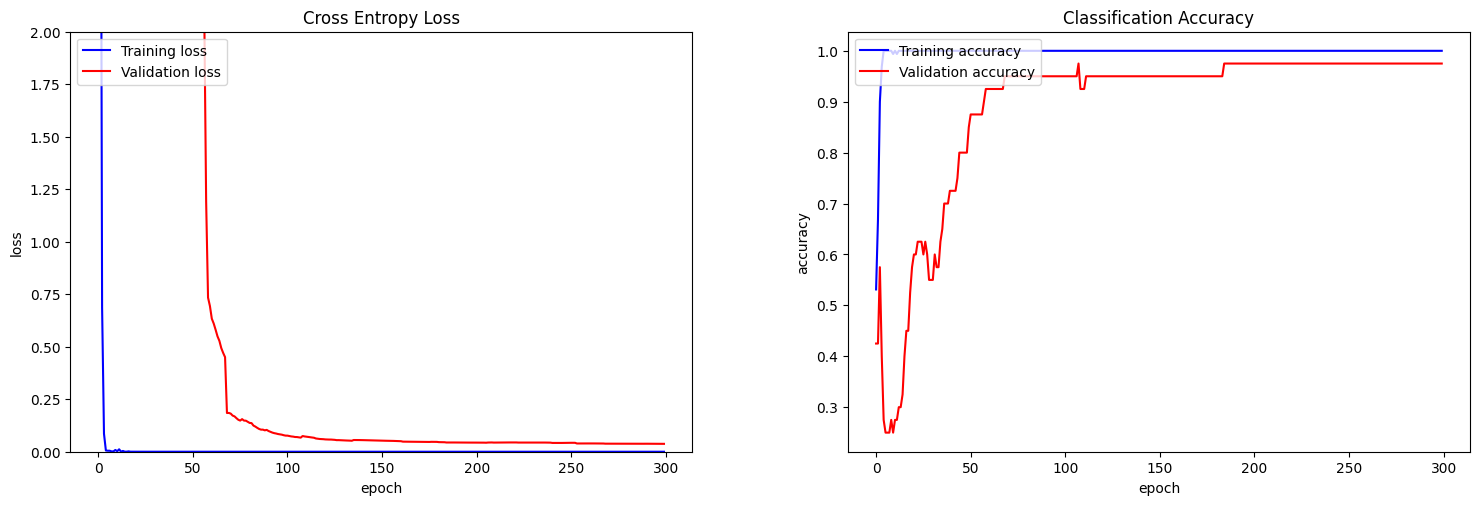

2/2 - 0s - loss: 0.0375 - accuracy: 0.9750 - 110ms/epoch - 55ms/step


In [ ]:
histories = list()
histories.append(history)
plot_curves(histories)

scores = model_TL.evaluate(X_test, y_test, verbose=2)